In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
## Сделаем функцию, которая будет заменять NaN значения на медиану в каждом столбце таблицы 
def delete_nan(table):
    for col in table.columns:
        table[col]= table[col].fillna(table[col].median())
    return table

In [3]:
## Сделаем функцию, которая будет заменять NaN значения на 0 в каждом столбце таблицы 
def delete_nan_with_0(table):
    for col in table.columns:
        table[col]= table[col].fillna(0)
    return table

In [4]:
##Удаляем поля, которые имеют одно уникальное значение
def delete_not_inf_cols(df):
    col=[]
    for col in df.columns.get_values():
        if (df[col].nunique()==1):
               df.drop([col], axis=1, inplace=True)
    return df


In [5]:
df_oper = pd.read_csv('operations.csv', sep = ',')

In [6]:
df_oper.head()

,client_id,datetime,code,type,sum,source_id
0,96372458,421 06:33:15,6011,2010,-561478.94,256572
1,64404394,399 06:56:49,6011,2010,-67377.47,330228
2,24567813,377 17:20:40,6011,7010,67377.47,542191
3,21717441,55 13:38:47,6011,2010,-44918.32,NaN
4,14331004,263 12:57:08,6011,2010,-3368873.66,980531


In [7]:
# Выделяем день транзакции
df_oper['day'] = df_oper.datetime.map(lambda x: x.split(" ")[0])
df_oper['day'].nunique()

457

In [8]:
df_oper['day'].astype(int).max()

456

In [9]:
# Формируем идентификатор затрат
df_oper['pay_ind'] = df_oper['sum'].map(lambda x: 1 if x>=0 else 0)

In [10]:
# Берем только затраты и смотрим, код, определенный как "Флористика"
day_sum_df = df_oper[(df_oper['pay_ind']==0) & ( df_oper['code']==5992)][['day', 'sum']].copy()

In [11]:
# Вычисляем количество транзакции по коду "Флористика" по дням 
day_sum_df = pd.DataFrame(day_sum_df.groupby(['day']).size().reset_index())
day_sum_df = day_sum_df.rename(columns={'day': 'day', 0: 'count_pay'})
day_sum_df.head()

,day,count_pay
0,0,9
1,1,9
2,10,8
3,100,7
4,101,13


In [12]:
# Преобразуем типы и сортируем по дате
import numpy as np
day_sum_df['day'] = day_sum_df['day'].astype(np.int64)
day_sum_df = day_sum_df.sort_values(['day'], ascending=[True])

In [13]:
day_sum_df.dtypes

day          int64
count_pay    int64
dtype: object

In [14]:
day_sum_df.max()

day          456
count_pay    126
dtype: int64

In [15]:
# Смотрим на количество дней транзакций
days = [x for x in range(df_oper['day'].astype(int).max()+1)]
print(max(days), min(days))

456 0


In [16]:
days_df = pd.DataFrame(days, columns=['day'])
result_day = pd.merge(days_df,day_sum_df, on='day',how='left')
result_day[result_day.isnull().count_pay]

,day,count_pay
2,2,NaN
157,157,NaN


In [17]:
# Заменяем NaN на 0- количество платежной транзакции по коду "Флористика" отсутствует
result_day = delete_nan_with_0(result_day)
result_day.head()

,day,count_pay
0,0,9.0
1,1,9.0
2,2,0.0
3,3,5.0
4,4,7.0


In [18]:
# дата, на которую приходится максимальное количество покупок по коду "Флористика"
result_day[result_day['count_pay'] ==result_day['count_pay'].max()].index[0]

219

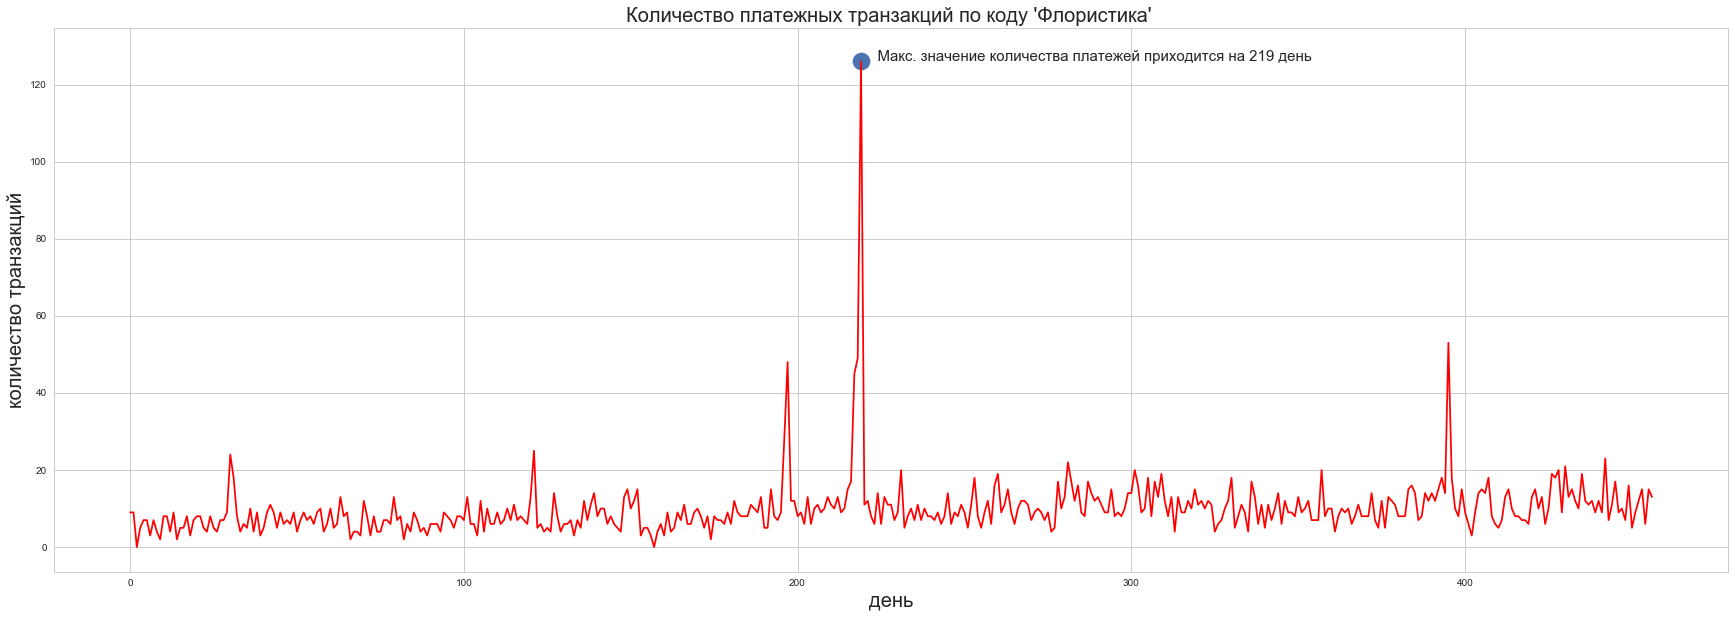

In [19]:
from matplotlib import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
# figure size in inches
rcParams['figure.figsize'] = 30,10
sns.set_style("whitegrid")
plt.plot( 'day', 'count_pay', data=result_day, color='r',label='Количество платежных транзакций по коду флористики')

plt.xlabel('день', fontsize=20)
plt.ylabel('количество транзакций',  fontsize=20)
plt.title('Количество платежных транзакций по коду \'Флористика\' ', fontsize=20)
#plt.axvline(x= result_day['count_pay'].max() , color='k', linestyle='--')
i = result_day[result_day['count_pay'] ==result_day['count_pay'].max()].index[0]
j = result_day['count_pay'].max()

plt.scatter(i,j, marker='o', s= 300)
plt.text(i,j, u'    Макс. значение количества платежей приходится на 219 день', fontsize=15)
#plt.scatter(i,0, marker='o', s=300)
#plt.xticks(result_day['day'])
#plt.xticks(result_day['day'])
#plt.yticks([])
plt.show()

In [20]:
result_day.sort_values(['count_pay'], ascending=False)

,day,count_pay
219,219,126.0
395,395,53.0
218,218,49.0
197,197,48.0
217,217,45.0
196,196,28.0
121,121,25.0
30,30,24.0
442,442,23.0
281,281,22.0


In [21]:
# Создаем таблицу с соответствием показателей номер дня- дата
timespan1 = 220
ndf1=  pd.DataFrame({'Date':pd.date_range(end ='2014-03-08', periods=timespan1).tolist()})
ndf1.Date


timespan2 = 237
ndf2=  pd.DataFrame({'Date':pd.date_range(start ='2014-03-09', periods=timespan2).tolist()})
ndf2.Date

tabs = [ndf1, ndf2]
df_dates = pd.concat(tabs)
df_dates.reset_index(inplace= True)

df_dates.drop(['index'], axis=1 , inplace= True)

In [22]:
df_dates.reset_index(inplace = True)
df_dates.rename(columns={'index': 'day'}, inplace=True)

In [23]:
for cols in df_dates.columns.values:
    df_dates[cols] = df_dates[cols].astype(str)

In [24]:
df_dates.dtypes

day     object
Date    object
dtype: object

In [25]:
# Проставляем соответствие номера дня к дате в исходной табличке со всеми транзакциями
df_oper.day = df_oper.day.astype(str)
df_oper = pd.merge(df_oper,df_dates, on='day',how='left')

In [26]:
# Преобразуем в дату
df_oper['Date']= pd.to_datetime(df_oper['Date'])
# Выделяем год и месяц транзакции
df_oper['Date_month']=  df_oper['Date'].dt.month
df_oper['Date_year']=  df_oper['Date'].dt.year

In [27]:
df_oper.datetime.head()

0    421 06:33:15
1    399 06:56:49
2    377 17:20:40
3     55 13:38:47
4    263 12:57:08
Name: datetime, dtype: object

In [28]:
# создаем поле, которое будет отвечать за период совершенной транзакции- день или ночь
df_oper['day_ind'] =df_oper.datetime.map(lambda x: x.split(" ")[1][:2]).astype(int)
df_oper['day_ind'] = df_oper['day_ind'].map(lambda x: 1 if x in list(range(9, 21)) else 0)

In [29]:
df_oper.source_id.nunique()

386344

In [30]:
df_oper.drop(['Date', 'datetime'], axis=1, inplace=True)

In [31]:
df_oper.head()

,client_id,code,type,sum,source_id,day,pay_ind,Date_month,Date_year,day_ind
0,96372458,6011,2010,-561478.94,256572,421,0,9,2014,0
1,64404394,6011,2010,-67377.47,330228,399,0,9,2014,0
2,24567813,6011,7010,67377.47,542191,377,1,8,2014,1
3,21717441,6011,2010,-44918.32,NaN,55,0,9,2013,1
4,14331004,6011,2010,-3368873.66,980531,263,0,4,2014,1


## Построение аггрегатов

### 1 codes

In [32]:
codes_count = df_oper.groupby(['client_id', 'code'])['code'].size()

In [33]:
aa =pd.DataFrame(codes_count)

In [34]:
aa.rename(columns={'code':'code_counts'}, inplace=True)

In [35]:
aa = aa.reset_index()

In [36]:
aa.head()

,client_id,code,code_counts
0,6815,4814,90
1,6815,5311,29
2,6815,5411,29
3,6815,5921,2
4,6815,6010,1


In [37]:
dict_id = dict()
for ids in aa['client_id'].unique():
    a = aa[aa['client_id']==ids]['code'].values.ravel().astype(object)    
    b = aa[aa['client_id']==ids]['code_counts'].values.ravel()
    mydict = dict(zip(a,b))
    dict_id[ids] = mydict
    mydict = dict()    

In [38]:
codes = pd.read_csv('codes.csv', sep = ';')

In [39]:
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовая женская одежда
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [40]:
codes = codes.code.tolist()
result_1 = pd.DataFrame(0, index=np.arange(len(dict_id.keys())), columns=[str(x) for x in codes])
result_1['client_id'] = dict_id.keys()

In [41]:
result_1.client_id.unique()

array([67917142, 73334791, 37945354, ..., 84639734, 79913275, 50167807], dtype=int64)

In [42]:
y = []
for key1 in result_1.client_id.unique():
    x=[]
    x = result_1[result_1['client_id']==key1].T.reset_index()['index'].iloc[:-1].astype(int).map(dict_id[key1]).tolist()
    x.append(key1)
    y.append(x)
    

In [43]:
agg1 = pd.DataFrame(y, columns=['count_all_code_'+ str(x) for x in result_1.columns.values])
agg1 = delete_nan_with_0(agg1)
agg1.rename(columns={'count_all__code_client_id': 'client_id'}, inplace=True)

In [44]:
agg1.rename(columns={'count_all_code_client_id': 'client_id'}, inplace=True)

In [45]:
agg1.head()

,count_all_code_5944,count_all_code_5621,count_all_code_5697,count_all_code_7995,count_all_code_5137,count_all_code_5964,count_all_code_7210,count_all_code_5949,count_all_code_5199,count_all_code_5072,count_all_code_5921,count_all_code_6051,count_all_code_4812,count_all_code_7512,count_all_code_5993,count_all_code_4215,count_all_code_5122,count_all_code_5942,count_all_code_7221,count_all_code_5733,count_all_code_5131,count_all_code_5261,count_all_code_5947,count_all_code_5722,count_all_code_8062,count_all_code_5441,count_all_code_5094,count_all_code_7299,count_all_code_5599,count_all_code_7298,count_all_code_7699,count_all_code_7273,count_all_code_5969,count_all_code_5511,count_all_code_6300,count_all_code_7338,count_all_code_7372,count_all_code_7278,count_all_code_5532,count_all_code_5950,count_all_code_7395,count_all_code_8398,count_all_code_6211,count_all_code_7829,count_all_code_5651,count_all_code_5193,count_all_code_5968,count_all_code_5912,count_all_code_5735,count_all_code_5816,count_all_code_5541,count_all_code_7011,count_all_code_5462,count_all_code_5172,count_all_code_7531,count_all_code_5943,count_all_code_5300,count_all_code_4789,count_all_code_4131,count_all_code_7538,count_all_code_8220,count_all_code_7932,count_all_code_4722,count_all_code_5734,count_all_code_8299,count_all_code_8071,count_all_code_7399,count_all_code_5948,count_all_code_7311,count_all_code_6011,count_all_code_7933,count_all_code_9311,count_all_code_5977,count_all_code_5085,count_all_code_8699,count_all_code_4112,count_all_code_8011,count_all_code_4814,count_all_code_5499,count_all_code_5965,count_all_code_4900,count_all_code_5970,count_all_code_5811,count_all_code_5533,count_all_code_1711,count_all_code_7216,count_all_code_5812,count_all_code_5251,count_all_code_7629,count_all_code_7996,count_all_code_5399,count_all_code_7542,count_all_code_5941,count_all_code_8043,count_all_code_4511,count_all_code_5065,count_all_code_3351,count_all_code_5231,count_all_code_6536,count_all_code_7375,count_all_code_5074,count_all_code_7523,count_all_code_5099,count_all_code_4411,count_all_code_5111,count_all_code_7832,count_all_code_1799,count_all_code_5992,count_all_code_9399,count_all_code_7999,count_all_code_5814,count_all_code_1731,count_all_code_4111,count_all_code_5971,count_all_code_3501,count_all_code_5631,count_all_code_8641,count_all_code_5422,count_all_code_5967,count_all_code_5945,count_all_code_7997,count_all_code_4121,count_all_code_4899,count_all_code_5169,count_all_code_5571,count_all_code_5691,count_all_code_5931,count_all_code_5655,count_all_code_8099,count_all_code_7991,count_all_code_5713,count_all_code_5311,count_all_code_7993,count_all_code_7841,count_all_code_5611,count_all_code_8244,count_all_code_5995,count_all_code_5039,count_all_code_6012,count_all_code_5813,count_all_code_5712,count_all_code_5661,count_all_code_5013,count_all_code_5699,count_all_code_4784,count_all_code_5714,count_all_code_3000,count_all_code_5451,count_all_code_5310,count_all_code_9222,count_all_code_5641,count_all_code_6010,count_all_code_5331,count_all_code_5681,count_all_code_5732,count_all_code_5976,count_all_code_5542,count_all_code_5309,count_all_code_5940,count_all_code_5719,count_all_code_5211,count_all_code_7994,count_all_code_4829,count_all_code_9402,count_all_code_8021,count_all_code_4214,count_all_code_6513,count_all_code_5411,count_all_code_5999,count_all_code_742,count_all_code_5946,count_all_code_5200,count_all_code_4816,count_all_code_7230,count_all_code_5047,count_all_code_5045,count_all_code_9211,count_all_code_8999,count_all_code_2741,count_all_code_5044,count_all_code_5983,count_all_code_5994,count_all_code_5192,count_all_code_7922,client_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,2.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### 2 types

In [46]:
types_count = df_oper.groupby(['client_id', 'type'])['type'].size()

aa =pd.DataFrame(types_count)
aa.rename(columns={'type':'type_counts'}, inplace=True)

aa = aa.reset_index()

dict_id = dict()
for ids in aa['client_id'].unique():
    a = aa[aa['client_id']==ids]['type'].values.ravel().astype(object)    
    b = aa[aa['client_id']==ids]['type_counts'].values.ravel()
    mydict = dict(zip(a,b))
    dict_id[ids] = mydict
    mydict = dict()    
    
types = pd.read_csv('types.csv', sep = ';')
types = types.type.tolist()

result_2 = pd.DataFrame(0, index=np.arange(len(dict_id.keys())), columns=[str(x) for x in types])
result_2['client_id'] = dict_id.keys()

In [47]:
y = []
for key1 in result_2.client_id.unique():
    x=[]
    x = result_2[result_2['client_id']==key1].T.reset_index()['index'].iloc[:-1].astype(int).map(dict_id[key1]).tolist()
    x.append(key1)
    y.append(x)
    

In [48]:
agg2 = pd.DataFrame(y, columns=['count_all_type_'+ str(x) for x in result_2.columns.values])
agg2 = delete_nan_with_0(agg2)
agg2.rename(columns={'count_all_type_client_id': 'client_id'}, inplace=True)

In [49]:
agg2.head()

,count_all_type_8001,count_all_type_2411,count_all_type_4035,count_all_type_3001,count_all_type_2420,count_all_type_1210,count_all_type_7050,count_all_type_8140,count_all_type_6000,count_all_type_1200,count_all_type_6210,count_all_type_4210,count_all_type_8220,count_all_type_2321,count_all_type_2432,count_all_type_2440,count_all_type_2360,count_all_type_8035,count_all_type_4083,count_all_type_1310,count_all_type_7010,count_all_type_7070,count_all_type_2410,count_all_type_2990,count_all_type_7081,count_all_type_2341,count_all_type_4051,count_all_type_2421,count_all_type_4000,count_all_type_6100,count_all_type_3200,count_all_type_2400,count_all_type_3120,count_all_type_2900,count_all_type_4061,count_all_type_2353,count_all_type_4100,count_all_type_7000,count_all_type_3210,count_all_type_4600,count_all_type_7034,count_all_type_999999,count_all_type_4080,count_all_type_7075,count_all_type_2370,count_all_type_2330,count_all_type_2350,count_all_type_2992,count_all_type_8230,count_all_type_2340,count_all_type_7060,count_all_type_7101,count_all_type_1030,count_all_type_4081,count_all_type_4090,count_all_type_8210,count_all_type_1000,count_all_type_7100,count_all_type_4021,count_all_type_2331,count_all_type_3810,count_all_type_4010,count_all_type_7014,count_all_type_4045,count_all_type_2351,count_all_type_2210,count_all_type_7045,count_all_type_2322,count_all_type_7084,count_all_type_7011,count_all_type_7090,count_all_type_4400,count_all_type_4030,count_all_type_2901,count_all_type_2011,count_all_type_7020,count_all_type_2352,count_all_type_4041,count_all_type_2402,count_all_type_4062,count_all_type_7025,count_all_type_6200,count_all_type_1100,count_all_type_4440,count_all_type_1410,count_all_type_2403,count_all_type_7091,count_all_type_2010,count_all_type_8100,count_all_type_7032,count_all_type_7015,count_all_type_7030,count_all_type_2000,count_all_type_2021,count_all_type_1110,count_all_type_7082,count_all_type_4020,count_all_type_1510,count_all_type_2401,count_all_type_2100,count_all_type_2430,count_all_type_3800,count_all_type_8146,count_all_type_7071,count_all_type_2325,count_all_type_7041,count_all_type_2342,count_all_type_4040,count_all_type_4500,count_all_type_2001,count_all_type_8000,count_all_type_5110,count_all_type_3030,count_all_type_7042,count_all_type_2323,count_all_type_8002,count_all_type_8050,count_all_type_4060,count_all_type_4050,count_all_type_2020,count_all_type_2200,count_all_type_7021,count_all_type_1010,count_all_type_7031,count_all_type_8150,count_all_type_2412,count_all_type_2332,count_all_type_4001,count_all_type_2371,count_all_type_4200,count_all_type_4011,count_all_type_4031,count_all_type_2110,count_all_type_2423,count_all_type_7044,count_all_type_3300,count_all_type_6010,count_all_type_2422,count_all_type_4082,count_all_type_8003,count_all_type_2354,count_all_type_7035,count_all_type_8151,count_all_type_2413,count_all_type_7024,count_all_type_7074,count_all_type_4052,count_all_type_8145,count_all_type_6110,count_all_type_4071,count_all_type_4110,count_all_type_2320,count_all_type_7040,count_all_type_2433,count_all_type_2431,client_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,67917142
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Code and types by month

## Codes monthly

In [50]:


codes = pd.read_csv('codes.csv', sep = ';')
codes = codes.code.tolist()

def codes_agg_by_month(i,df_oper, codes ):
    
    codes_count = df_oper[df_oper['Date_month'] ==i].groupby(['client_id', 'code'])['code'].size()
    aa =pd.DataFrame(codes_count)

    aa.rename(columns={'code':'code_counts'}, inplace=True)
    aa = aa.reset_index()
    
    # Создаем словарь числа встречаемости транзакций по определенному коду для каждого client_id
    mydict = dict()
    dict_id = dict()
    for ids in aa['client_id'].unique():
        a = aa[aa['client_id']==ids]['code'].values.ravel().astype(object)    
        b = aa[aa['client_id']==ids]['code_counts'].values.ravel()
        mydict = dict(zip(a,b))
        dict_id[ids] = mydict
        mydict = dict()    

    
    # Создаем промежуточную таблицу- каркас для заполнения
    result_1 = pd.DataFrame(0, index=np.arange(len(dict_id.keys())), columns=[str(x) for x in codes])
    result_1['client_id'] = dict_id.keys()
    
    # Заполняем массив встречаемости кода для каждого client_id и создаем матрицу 
    y = []
    for key1 in result_1.client_id.unique():
        x=[]
        x = result_1[result_1['client_id']==key1].T.reset_index()['index'].iloc[:-1].astype(int).map(dict_id[key1]).tolist()
        x.append(key1)
        y.append(x)
    
    # Заносим матрицу встречаемости кода для каждого абонента в таблицу
    agg_new = pd.DataFrame(y, columns=['count_code_'+str(i)+ '_month_'+str(x) for x in result_1.columns.values])
    agg_new = delete_nan_with_0(agg_new)
    agg_new.rename(columns={'count_code_'+ str(i)+ '_month_' + 'client_id': 'client_id'}, inplace=True)
 
    return agg_new
    

In [51]:
month = np.sort(df_oper.Date_month.unique()).tolist()
tab_names = ['agg_codes_'+ str(x)+ '_month' for x in month]
tab_names
for var in zip(tab_names,month):
    exec("%s=%s" % (var[0], var[1]))

In [52]:
## Создаем аггрегаты для кодов помесячные

agg_codes_1_month= codes_agg_by_month(1,df_oper, codes ) 
print('Table agg_codes_1_month created')
agg_codes_2_month= codes_agg_by_month(2,df_oper, codes ) 
print('Table agg_codes_2_month created')
agg_codes_3_month= codes_agg_by_month(3,df_oper, codes )
print('Table agg_codes_3_month created')
agg_codes_4_month= codes_agg_by_month(4,df_oper, codes )
print('Table agg_codes_4_month created')
agg_codes_5_month= codes_agg_by_month(5,df_oper, codes ) 
print('Table agg_codes_5_month created')
agg_codes_6_month= codes_agg_by_month(6,df_oper, codes ) 
print('Table agg_codes_6_month created')
agg_codes_7_month= codes_agg_by_month(7,df_oper, codes )
print('Table agg_codes_7_month created')
agg_codes_8_month= codes_agg_by_month(8,df_oper, codes ) 
print('Table agg_codes_8_month created')
agg_codes_9_month= codes_agg_by_month(9,df_oper, codes ) 
print('Table agg_codes_9_month created')
agg_codes_10_month= codes_agg_by_month(10,df_oper, codes )
print('Table agg_codes_10_month created')
agg_codes_11_month= codes_agg_by_month(11,df_oper, codes ) 
print('Table agg_codes_11_month created')
agg_codes_12_month= codes_agg_by_month(12,df_oper, codes ) 
print('Table agg_codes_12_month created')

Table agg_codes_1_month created
Table agg_codes_2_month created
Table agg_codes_3_month created
Table agg_codes_4_month created
Table agg_codes_5_month created
Table agg_codes_6_month created
Table agg_codes_7_month created
Table agg_codes_8_month created
Table agg_codes_9_month created
Table agg_codes_10_month created
Table agg_codes_11_month created
Table agg_codes_12_month created


In [53]:
agg_codes_7_month.head()

,count_code_7_month_5944,count_code_7_month_5621,count_code_7_month_5697,count_code_7_month_7995,count_code_7_month_5137,count_code_7_month_5964,count_code_7_month_7210,count_code_7_month_5949,count_code_7_month_5199,count_code_7_month_5072,count_code_7_month_5921,count_code_7_month_6051,count_code_7_month_4812,count_code_7_month_7512,count_code_7_month_5993,count_code_7_month_4215,count_code_7_month_5122,count_code_7_month_5942,count_code_7_month_7221,count_code_7_month_5733,count_code_7_month_5131,count_code_7_month_5261,count_code_7_month_5947,count_code_7_month_5722,count_code_7_month_8062,count_code_7_month_5441,count_code_7_month_5094,count_code_7_month_7299,count_code_7_month_5599,count_code_7_month_7298,count_code_7_month_7699,count_code_7_month_7273,count_code_7_month_5969,count_code_7_month_5511,count_code_7_month_6300,count_code_7_month_7338,count_code_7_month_7372,count_code_7_month_7278,count_code_7_month_5532,count_code_7_month_5950,count_code_7_month_7395,count_code_7_month_8398,count_code_7_month_6211,count_code_7_month_7829,count_code_7_month_5651,count_code_7_month_5193,count_code_7_month_5968,count_code_7_month_5912,count_code_7_month_5735,count_code_7_month_5816,count_code_7_month_5541,count_code_7_month_7011,count_code_7_month_5462,count_code_7_month_5172,count_code_7_month_7531,count_code_7_month_5943,count_code_7_month_5300,count_code_7_month_4789,count_code_7_month_4131,count_code_7_month_7538,count_code_7_month_8220,count_code_7_month_7932,count_code_7_month_4722,count_code_7_month_5734,count_code_7_month_8299,count_code_7_month_8071,count_code_7_month_7399,count_code_7_month_5948,count_code_7_month_7311,count_code_7_month_6011,count_code_7_month_7933,count_code_7_month_9311,count_code_7_month_5977,count_code_7_month_5085,count_code_7_month_8699,count_code_7_month_4112,count_code_7_month_8011,count_code_7_month_4814,count_code_7_month_5499,count_code_7_month_5965,count_code_7_month_4900,count_code_7_month_5970,count_code_7_month_5811,count_code_7_month_5533,count_code_7_month_1711,count_code_7_month_7216,count_code_7_month_5812,count_code_7_month_5251,count_code_7_month_7629,count_code_7_month_7996,count_code_7_month_5399,count_code_7_month_7542,count_code_7_month_5941,count_code_7_month_8043,count_code_7_month_4511,count_code_7_month_5065,count_code_7_month_3351,count_code_7_month_5231,count_code_7_month_6536,count_code_7_month_7375,count_code_7_month_5074,count_code_7_month_7523,count_code_7_month_5099,count_code_7_month_4411,count_code_7_month_5111,count_code_7_month_7832,count_code_7_month_1799,count_code_7_month_5992,count_code_7_month_9399,count_code_7_month_7999,count_code_7_month_5814,count_code_7_month_1731,count_code_7_month_4111,count_code_7_month_5971,count_code_7_month_3501,count_code_7_month_5631,count_code_7_month_8641,count_code_7_month_5422,count_code_7_month_5967,count_code_7_month_5945,count_code_7_month_7997,count_code_7_month_4121,count_code_7_month_4899,count_code_7_month_5169,count_code_7_month_5571,count_code_7_month_5691,count_code_7_month_5931,count_code_7_month_5655,count_code_7_month_8099,count_code_7_month_7991,count_code_7_month_5713,count_code_7_month_5311,count_code_7_month_7993,count_code_7_month_7841,count_code_7_month_5611,count_code_7_month_8244,count_code_7_month_5995,count_code_7_month_5039,count_code_7_month_6012,count_code_7_month_5813,count_code_7_month_5712,count_code_7_month_5661,count_code_7_month_5013,count_code_7_month_5699,count_code_7_month_4784,count_code_7_month_5714,count_code_7_month_3000,count_code_7_month_5451,count_code_7_month_5310,count_code_7_month_9222,count_code_7_month_5641,count_code_7_month_6010,count_code_7_month_5331,count_code_7_month_5681,count_code_7_month_5732,count_code_7_month_5976,count_code_7_month_5542,count_code_7_month_5309,count_code_7_month_5940,count_code_7_month_5719,count_code_7_month_5211,count_code_7_month_7994,count_code_7_month_4829,count_code_7_month_9402,count_code_7_month_8021,count_code_7_month_4214,count_code_7_mo

## Types monthly

In [54]:
types = pd.read_csv('types.csv', sep = ';')
types = types.type.tolist()

def types_agg_by_month(i,df_oper, types ):
    
    types_count = df_oper[df_oper['Date_month'] ==i].groupby(['client_id', 'type'])['type'].size()

    aa =pd.DataFrame(types_count)
    aa.rename(columns={'type':'type_counts'}, inplace=True)
    aa = aa.reset_index()

    # Создаем словарь числа встречаемости транзакций по определенному типу для каждого client_id
    mydict = dict() 
    dict_id = dict()
    for ids in aa['client_id'].unique():
        a = aa[aa['client_id']==ids]['type'].values.ravel().astype(object)    
        b = aa[aa['client_id']==ids]['type_counts'].values.ravel()
        mydict = dict(zip(a,b))
        dict_id[ids] = mydict
        mydict = dict()    
    
    # Создаем промежуточную таблицу- каркас для заполнения
    result_2 = pd.DataFrame(0, index=np.arange(len(dict_id.keys())), columns=[str(x) for x in types])
    result_2['client_id'] = dict_id.keys()
    
    # Заполняем массив встречаемости кода для каждого client_id и создаем матрицу 
    y = []
    for key1 in result_2.client_id.unique():
        x=[]
        x = result_2[result_2['client_id']==key1].T.reset_index()['index'].iloc[:-1].astype(int).map(dict_id[key1]).tolist()
        x.append(key1)
        y.append(x)
        
    # Заносим матрицу встречаемости кода для каждого абонента в таблицу
    agg_new1 = pd.DataFrame(y, columns=['count_type_'+str(i)+ '_month_'+str(x) for x in result_2.columns.values])
    agg_new1 = delete_nan_with_0(agg_new1)
    agg_new1.rename(columns={'count_type_' +str(i)+ '_month_'+ 'client_id': 'client_id'}, inplace=True)
    
    return agg_new1

In [55]:
agg_types_1_month= types_agg_by_month(1,df_oper, types ) 
print('Table agg_types_1_month created')
agg_types_2_month= types_agg_by_month(2,df_oper, types ) 
print('Table agg_types_2_month created')
agg_types_3_month= types_agg_by_month(3,df_oper, types )
print('Table agg_types_3_month created')
agg_types_4_month= types_agg_by_month(4,df_oper, types )
print('Table agg_types_4_month created')
agg_types_5_month= types_agg_by_month(5,df_oper, types ) 
print('Table agg_types_5_month created')
agg_types_6_month= types_agg_by_month(6,df_oper, types ) 
print('Table agg_types_6_month created')
agg_types_7_month= types_agg_by_month(7,df_oper, types )
print('Table agg_types_7_month created')
agg_types_8_month= types_agg_by_month(8,df_oper, types ) 
print('Table agg_types_8_month created')
agg_types_9_month= types_agg_by_month(9,df_oper, types ) 
print('Table agg_types_9_month created')
agg_types_10_month= types_agg_by_month(10,df_oper, types )
print('Table agg_types_10_month created')
agg_types_11_month= types_agg_by_month(11,df_oper, types ) 
print('Table agg_types_11_month created')
agg_types_12_month= types_agg_by_month(12,df_oper, types ) 
print('Table agg_types_12_month created')

Table agg_types_1_month created
Table agg_types_2_month created
Table agg_types_3_month created
Table agg_types_4_month created
Table agg_types_5_month created
Table agg_types_6_month created
Table agg_types_7_month created
Table agg_types_8_month created
Table agg_types_9_month created
Table agg_types_10_month created
Table agg_types_11_month created
Table agg_types_12_month created


In [56]:
agg_types_11_month.head()

,count_type_11_month_8001,count_type_11_month_2411,count_type_11_month_4035,count_type_11_month_3001,count_type_11_month_2420,count_type_11_month_1210,count_type_11_month_7050,count_type_11_month_8140,count_type_11_month_6000,count_type_11_month_1200,count_type_11_month_6210,count_type_11_month_4210,count_type_11_month_8220,count_type_11_month_2321,count_type_11_month_2432,count_type_11_month_2440,count_type_11_month_2360,count_type_11_month_8035,count_type_11_month_4083,count_type_11_month_1310,count_type_11_month_7010,count_type_11_month_7070,count_type_11_month_2410,count_type_11_month_2990,count_type_11_month_7081,count_type_11_month_2341,count_type_11_month_4051,count_type_11_month_2421,count_type_11_month_4000,count_type_11_month_6100,count_type_11_month_3200,count_type_11_month_2400,count_type_11_month_3120,count_type_11_month_2900,count_type_11_month_4061,count_type_11_month_2353,count_type_11_month_4100,count_type_11_month_7000,count_type_11_month_3210,count_type_11_month_4600,count_type_11_month_7034,count_type_11_month_999999,count_type_11_month_4080,count_type_11_month_7075,count_type_11_month_2370,count_type_11_month_2330,count_type_11_month_2350,count_type_11_month_2992,count_type_11_month_8230,count_type_11_month_2340,count_type_11_month_7060,count_type_11_month_7101,count_type_11_month_1030,count_type_11_month_4081,count_type_11_month_4090,count_type_11_month_8210,count_type_11_month_1000,count_type_11_month_7100,count_type_11_month_4021,count_type_11_month_2331,count_type_11_month_3810,count_type_11_month_4010,count_type_11_month_7014,count_type_11_month_4045,count_type_11_month_2351,count_type_11_month_2210,count_type_11_month_7045,count_type_11_month_2322,count_type_11_month_7084,count_type_11_month_7011,count_type_11_month_7090,count_type_11_month_4400,count_type_11_month_4030,count_type_11_month_2901,count_type_11_month_2011,count_type_11_month_7020,count_type_11_month_2352,count_type_11_month_4041,count_type_11_month_2402,count_type_11_month_4062,count_type_11_month_7025,count_type_11_month_6200,count_type_11_month_1100,count_type_11_month_4440,count_type_11_month_1410,count_type_11_month_2403,count_type_11_month_7091,count_type_11_month_2010,count_type_11_month_8100,count_type_11_month_7032,count_type_11_month_7015,count_type_11_month_7030,count_type_11_month_2000,count_type_11_month_2021,count_type_11_month_1110,count_type_11_month_7082,count_type_11_month_4020,count_type_11_month_1510,count_type_11_month_2401,count_type_11_month_2100,count_type_11_month_2430,count_type_11_month_3800,count_type_11_month_8146,count_type_11_month_7071,count_type_11_month_2325,count_type_11_month_7041,count_type_11_month_2342,count_type_11_month_4040,count_type_11_month_4500,count_type_11_month_2001,count_type_11_month_8000,count_type_11_month_5110,count_type_11_month_3030,count_type_11_month_7042,count_type_11_month_2323,count_type_11_month_8002,count_type_11_month_8050,count_type_11_month_4060,count_type_11_month_4050,count_type_11_month_2020,count_type_11_month_2200,count_type_11_month_7021,count_type_11_month_1010,count_type_11_month_7031,count_type_11_month_8150,count_type_11_month_2412,count_type_11_month_2332,count_type_11_month_4001,count_type_11_month_2371,count_type_11_month_4200,count_type_11_month_4011,count_type_11_month_4031,count_type_11_month_2110,count_type_11_month_2423,count_type_11_month_7044,count_type_11_month_3300,count_type_11_month_6010,count_type_11_month_2422,count_type_11_month_4082,count_type_11_month_8003,count_type_11_month_2354,count_type_11_month_7035,count_type_11_month_8151,count_type_11_month_2413,count_type_11_month_7024,count_type_11_month_7074,count_type_11_month_4052,count_type_11_month_8145,count_type_11_month_6110,count_type_11_month_4071,count_type_11_month_4110,count_type_11_month_2320,count_type_11_month_7040,count_type_11_month_2433,count_type_11_month_2431,client_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# 3 sum 

In [57]:
# Создаем таблицу суммарных переводов и пополнений
agg_sum =  pd.DataFrame(df_oper.groupby(['client_id', 'pay_ind'])['sum'].sum()).reset_index()
agg_sum_recharge_all = agg_sum[agg_sum['pay_ind'] ==1]
agg_sum_pay_all = agg_sum[agg_sum['pay_ind'] ==1]

In [58]:
# Суммарная транзакция по пополнению за все время
agg_sum_pay_all.rename(columns={'sum': 'sum_pay_all'}, inplace=True)
agg_sum_pay_all.drop(['pay_ind'], axis=1, inplace=True)

# Суммарная транзакция по платежу за все время
agg_sum_recharge_all.rename(columns={'sum': 'sum_recharge_all'}, inplace=True)
agg_sum_recharge_all.drop(['pay_ind'], axis=1, inplace=True)

In [59]:
# Остаток на счете за весь период
rest_sum_all = pd.DataFrame(df_oper.groupby(['client_id'])['sum'].sum())
rest_sum_all = rest_sum_all.reset_index()
rest_sum_all.rename(columns={'sum': 'sum_rest_all'}, inplace=True)

In [60]:
rest_sum_all.head()

,client_id,sum_rest_all
0,6815,-1249454.87
1,22899,-629796.59
2,27914,-2977026.82
3,28753,-26546282.86
4,31385,-2180003.58


### By month

In [61]:
def agg_sum_by_month(i, df_oper):
    # Создаем таблицу суммарных переводов и пополнений
    agg_sum =  pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id', 'pay_ind'])['sum'].sum()).reset_index()
    agg_sum_recharge = agg_sum[agg_sum['pay_ind'] ==1]
    agg_sum_pay = agg_sum[agg_sum['pay_ind'] ==1]
    
    # Суммарная транзакция по пополнению за все время
    agg_sum_pay.rename(columns={'sum': 'sum_pay_'+ str(i)}, inplace=True)
    agg_sum_pay.drop(['pay_ind'], axis=1, inplace=True)

    # Суммарная транзакция по платежу за все время
    agg_sum_recharge.rename(columns={'sum': 'sum_recharge_'+ str(i)}, inplace=True)
    agg_sum_recharge.drop(['pay_ind'], axis=1, inplace=True)
    
    # Остаток на счете за весь период
    rest_sum = pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id'])['sum'].sum())
    rest_sum = rest_sum.reset_index()
    rest_sum.rename(columns={'sum': 'sum_rest_'+ str(i)}, inplace=True)
    
    return agg_sum_pay, agg_sum_recharge, rest_sum
    

In [62]:
agg_sum_1_month,agg_sum_recharge_1_month,rest_sum_1_month  = agg_sum_by_month(1,df_oper ) 
print('Table agg_sum_1_month created')
agg_sum_2_month,agg_sum_recharge_2_month,rest_sum_2_month= agg_sum_by_month(2,df_oper ) 
print('Table agg_sum_2_month created')
agg_sum_3_month,agg_sum_recharge_3_month,rest_sum_3_month= agg_sum_by_month(3,df_oper )
print('Table agg_sum_3_month created')
agg_sum_4_month,agg_sum_recharge_4_month,rest_sum_4_month= agg_sum_by_month(4,df_oper )
print('Table agg_sum_4_month created')
agg_sum_5_month,agg_sum_recharge_5_month,rest_sum_5_month= agg_sum_by_month(5,df_oper ) 
print('Table agg_sum_5_month created')
agg_sum_6_month,agg_sum_recharge_6_month,rest_sum_6_month= agg_sum_by_month(6,df_oper ) 
print('Table agg_sum_6_month created')
agg_sum_7_month,agg_sum_recharge_7_month,rest_sum_7_month= agg_sum_by_month(7,df_oper )
print('Table agg_sum_7_month created')
agg_sum_8_month,agg_sum_recharge_8_month,rest_sum_8_month= agg_sum_by_month(8,df_oper ) 
print('Table agg_sum_8_month created')
agg_sum_9_month,agg_sum_recharge_9_month,rest_sum_9_month= agg_sum_by_month(9,df_oper ) 
print('Table agg_sum_9_month created')
agg_sum_10_month,agg_sum_recharge_10_month,rest_sum_10_month= agg_sum_by_month(10,df_oper )
print('Table agg_sum_10_month created')
agg_sum_11_month,agg_sum_recharge_11_month,rest_sum_11_month= agg_sum_by_month(11,df_oper ) 
print('Table agg_sum_11_month created')
agg_sum_12_month,agg_sum_recharge_12_month,rest_sum_12_month= agg_sum_by_month(12,df_oper ) 
print('Table agg_sum_12_month created')

Table agg_sum_1_month created
Table agg_sum_2_month created
Table agg_sum_3_month created
Table agg_sum_4_month created
Table agg_sum_5_month created
Table agg_sum_6_month created
Table agg_sum_7_month created
Table agg_sum_8_month created
Table agg_sum_9_month created
Table agg_sum_10_month created
Table agg_sum_11_month created
Table agg_sum_12_month created


In [63]:
rest_sum_12_month.head()

,client_id,sum_rest_12
0,6815,-406510.79
1,22899,38180.56
2,27914,-336887.40
3,28753,-1345805.75
4,31385,-234895.84


### min sum

In [64]:
def agg_sum_by_month_min(i, df_oper):
    # Создаем таблицу суммарных переводов и пополнений
    agg_sum =  pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id', 'pay_ind'])['sum'].min()).reset_index()
    agg_sum_recharge = agg_sum[agg_sum['pay_ind'] ==1]
    agg_sum_pay = agg_sum[agg_sum['pay_ind'] ==1]
    
    # Суммарная транзакция по пополнению за все время
    agg_sum_pay.rename(columns={'sum': 'sum_pay_min_'+ str(i)+ '_month'}, inplace=True)
    agg_sum_pay.drop(['pay_ind'], axis=1, inplace=True)

    # Суммарная транзакция по платежу за все время
    agg_sum_recharge.rename(columns={'sum': 'sum_recharge_min_'+ str(i)+ '_month'}, inplace=True)
    agg_sum_recharge.drop(['pay_ind'], axis=1, inplace=True)
    
    # Остаток на счете за весь период
    rest_sum = pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id'])['sum'].min())
    rest_sum = rest_sum.reset_index()
    rest_sum.rename(columns={'sum': 'sum_rest_min_'+ str(i)+ '_month'}, inplace=True)
    
    return agg_sum_pay, agg_sum_recharge, rest_sum

In [65]:
agg_sum_1_month_min,agg_sum_recharge_1_month_min,rest_sum_1_month_min  = agg_sum_by_month_min(1,df_oper ) 

agg_sum_2_month_min,agg_sum_recharge_2_month_min,rest_sum_2_month_min= agg_sum_by_month_min(2,df_oper ) 

agg_sum_3_month_min,agg_sum_recharge_3_month_min,rest_sum_3_month_min= agg_sum_by_month_min(3,df_oper )

agg_sum_4_month_min,agg_sum_recharge_4_month_min,rest_sum_4_month_min= agg_sum_by_month_min(4,df_oper )

agg_sum_5_month_min,agg_sum_recharge_5_month_min,rest_sum_5_month_min= agg_sum_by_month_min(5,df_oper ) 

agg_sum_6_month_min,agg_sum_recharge_6_month_min,rest_sum_6_month_min= agg_sum_by_month_min(6,df_oper ) 

agg_sum_7_month_min,agg_sum_recharge_7_month_min,rest_sum_7_month_min= agg_sum_by_month_min(7,df_oper )

agg_sum_8_month_min,agg_sum_recharge_8_month_min,rest_sum_8_month_min= agg_sum_by_month_min(8,df_oper ) 

agg_sum_9_month_min,agg_sum_recharge_9_month_min,rest_sum_9_month_min= agg_sum_by_month_min(9,df_oper ) 

agg_sum_10_month_min,agg_sum_recharge_10_month_min,rest_sum_10_month_min= agg_sum_by_month_min(10,df_oper )

agg_sum_11_month_min,agg_sum_recharge_11_month_min,rest_sum_11_month_min= agg_sum_by_month_min(11,df_oper )

agg_sum_12_month_min,agg_sum_recharge_12_month_min,rest_sum_12_month_min= agg_sum_by_month_min(12,df_oper ) 


In [66]:
rest_sum_12_month_min.head()

,client_id,sum_rest_min_12_month
0,6815,-112295.79
1,22899,-123525.37
2,27914,-422232.17
3,28753,-1237499.59
4,31385,-67377.47


## max sum

In [67]:
def agg_sum_by_month_max(i, df_oper):
    # Создаем таблицу суммарных переводов и пополнений
    agg_sum =  pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id', 'pay_ind'])['sum'].max()).reset_index()
    agg_sum_recharge = agg_sum[agg_sum['pay_ind'] ==1]
    agg_sum_pay = agg_sum[agg_sum['pay_ind'] ==1]
    
    # Суммарная транзакция по пополнению за все время
    agg_sum_pay.rename(columns={'sum': 'sum_pay_max_'+ str(i)+ '_month'}, inplace=True)
    agg_sum_pay.drop(['pay_ind'], axis=1, inplace=True)

    # Суммарная транзакция по платежу за все время
    agg_sum_recharge.rename(columns={'sum': 'sum_recharge_max_'+ str(i) + '_month'}, inplace=True)
    agg_sum_recharge.drop(['pay_ind'], axis=1, inplace=True)
    
    # Остаток на счете за весь период
    rest_sum = pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id'])['sum'].max())
    rest_sum = rest_sum.reset_index()
    rest_sum.rename(columns={'sum': 'sum_rest_max_'+ str(i)+ '_month'}, inplace=True)
    
    return agg_sum_pay, agg_sum_recharge, rest_sum

In [68]:
agg_sum_1_month_max,agg_sum_recharge_1_month_max,rest_sum_1_month_max  = agg_sum_by_month_max(1,df_oper ) 

agg_sum_2_month_max,agg_sum_recharge_2_month_max,rest_sum_2_month_max= agg_sum_by_month_max(2,df_oper ) 

agg_sum_3_month_max,agg_sum_recharge_3_month_max,rest_sum_3_month_max= agg_sum_by_month_max(3,df_oper )

agg_sum_4_month_max,agg_sum_recharge_4_month_max,rest_sum_4_month_max= agg_sum_by_month_max(4,df_oper )

agg_sum_5_month_max,agg_sum_recharge_5_month_max,rest_sum_5_month_max= agg_sum_by_month_max(5,df_oper ) 

agg_sum_6_month_max,agg_sum_recharge_6_month_max,rest_sum_6_month_max= agg_sum_by_month_max(6,df_oper ) 

agg_sum_7_month_max,agg_sum_recharge_7_month_max,rest_sum_7_month_max= agg_sum_by_month_max(7,df_oper )

agg_sum_8_month_max,agg_sum_recharge_8_month_max,rest_sum_8_month_max= agg_sum_by_month_max(8,df_oper ) 

agg_sum_9_month_max,agg_sum_recharge_9_month_max,rest_sum_9_month_max= agg_sum_by_month_max(9,df_oper ) 

agg_sum_10_month_max,agg_sum_recharge_10_month_max,rest_sum_10_month_max= agg_sum_by_month_max(10,df_oper )

agg_sum_11_month_max,agg_sum_recharge_11_month_max,rest_sum_11_month_max= agg_sum_by_month_max(11,df_oper )

agg_sum_12_month_max,agg_sum_recharge_12_month_max,rest_sum_12_month_max= agg_sum_by_month_max(12,df_oper ) 

In [69]:
rest_sum_12_month_max.head()

,client_id,sum_rest_max_12_month
0,6815,-2245.92
1,22899,134754.95
2,27914,89836.63
3,28753,1684436.83
4,31385,33688.74


## 4 pay_ind

In [70]:
# Количество транакций по платежу и пополнению
pay_ind_all = pd.DataFrame(df_oper.groupby(['client_id', 'pay_ind'])['pay_ind'].agg('count'))
pay_ind_all.rename(columns={'pay_ind': 'pay_ind_count'}, inplace=True)
pay_ind_all.reset_index(inplace=True)

## Количество платежных транзакций
pay_ind_all_pay = pay_ind_all[pay_ind_all['pay_ind']==0].drop(['pay_ind'], axis=1)
pay_ind_all_pay.rename(columns={'pay_ind_count': 'pay_ind_count0'}, inplace=True)

#Количество пополняемых транзакций
pay_ind_all_recharge = pay_ind_all[pay_ind_all['pay_ind']==1].drop(['pay_ind'], axis=1)
pay_ind_all_recharge.rename(columns={'pay_ind_count': 'pay_ind_count1'}, inplace=True)

# Количество всех транзакций
pay_ind_allcount = pd.DataFrame(df_oper.groupby(['client_id'])['pay_ind'].agg('count'))
pay_ind_allcount.rename(columns={'pay_ind': 'pay_ind_count2'}, inplace=True)
pay_ind_allcount.reset_index(inplace=True)

In [71]:
pay_ind_all_pay.head()

,client_id,pay_ind_count0
0,6815,220
2,22899,166
4,27914,76
6,28753,244
8,31385,342


In [72]:


def agg_pay_ind_by_month_cnt(i, df_oper):
    
    # Количество транакций по платежу и пополнению
    pay_ind_new = pd.DataFrame(df_oper[df_oper['Date_month']==i].groupby(['client_id', 'pay_ind'])['pay_ind'].agg('count'))
    pay_ind_new.rename(columns={'pay_ind': 'pay_ind_count'}, inplace=True)
    pay_ind_new.reset_index(inplace=True)

    ## Количество платежных транзакций
    pay_ind_new_pay = pay_ind_new[pay_ind_new['pay_ind']==0].drop(['pay_ind'], axis=1)
    pay_ind_new_pay.rename(columns={'pay_ind_count': 'pay_ind_count0'+ '_month_'+str(i)}, inplace=True)

    #Количество пополняемых транзакций
    pay_ind_new_recharge = pay_ind_new[pay_ind_new['pay_ind']==1].drop(['pay_ind'], axis=1)
    pay_ind_new_recharge.rename(columns={'pay_ind_count': 'pay_ind_count1'+ '_month_'+str(i)}, inplace=True)

    
    return pay_ind_new_pay, pay_ind_new_recharge

In [73]:
agg_pay_ind_1_month_cnt,agg_pay_ind_recharge_1_month_cnt  = agg_pay_ind_by_month_cnt(1,df_oper ) 

agg_pay_ind_2_month_cnt,agg_pay_ind_recharge_2_month_cnt= agg_pay_ind_by_month_cnt(2,df_oper ) 

agg_pay_ind_3_month_cnt,agg_pay_ind_recharge_3_month_cnt= agg_pay_ind_by_month_cnt(3,df_oper )

agg_pay_ind_4_month_cnt,agg_pay_ind_recharge_4_month_cnt= agg_pay_ind_by_month_cnt(4,df_oper )

agg_pay_ind_5_month_cnt,agg_pay_ind_recharge_5_month_cnt= agg_pay_ind_by_month_cnt(5,df_oper ) 

agg_pay_ind_6_month_cnt,agg_pay_ind_recharge_6_month_cnt= agg_pay_ind_by_month_cnt(6,df_oper ) 

agg_pay_ind_7_month_cnt,agg_pay_ind_recharge_7_month_cnt= agg_pay_ind_by_month_cnt(7,df_oper )

agg_pay_ind_8_month_cnt,agg_pay_ind_recharge_8_month_cnt= agg_pay_ind_by_month_cnt(8,df_oper ) 

agg_pay_ind_9_month_cnt,agg_pay_ind_recharge_9_month_cnt= agg_pay_ind_by_month_cnt(9,df_oper ) 

agg_pay_ind_10_month_cnt,agg_pay_ind_recharge_10_month_cnt= agg_pay_ind_by_month_cnt(10,df_oper )

agg_pay_ind_11_month_cnt,agg_pay_ind_recharge_11_month_cnt= agg_pay_ind_by_month_cnt(11,df_oper )

agg_pay_ind_12_month_cnt,agg_pay_ind_recharge_12_month_cnt= agg_pay_ind_by_month_cnt(12,df_oper ) 

In [74]:
agg_pay_ind_12_month_cnt.head()

,client_id,pay_ind_count0_month_12
0,6815,14
1,22899,3
3,27914,10
5,28753,38
7,31385,30


## 5 day_ind

In [75]:
day_ind_all = pd.DataFrame(df_oper.groupby(['client_id', 'day_ind'])['day_ind'].agg('count'))
day_ind_all.rename(columns={'day_ind': 'day_ind_count'}, inplace=True)
day_ind_all.reset_index(inplace=True)

## Количество ночных транзакций
day_ind_all0 = day_ind_all[day_ind_all['day_ind']==0].drop(['day_ind'], axis=1)
day_ind_all0.rename(columns={'day_ind_count': 'day_ind_count0'}, inplace=True)

#Количество дневных транзакций
day_ind_all1 = day_ind_all[day_ind_all['day_ind']==1].drop(['day_ind'], axis=1)
day_ind_all1.rename(columns={'day_ind_count': 'day_ind_count1'}, inplace=True)

# Количество всех транзакций
day_ind_allcount = pd.DataFrame(df_oper.groupby(['client_id'])['day_ind'].agg('count'))
day_ind_allcount.rename(columns={'day_ind': 'day_ind_count2'}, inplace=True)
day_ind_allcount.reset_index(inplace=True)

In [76]:
day_ind_allcount.head()

,client_id,day_ind_count2
0,6815,226
1,22899,234
2,27914,111
3,28753,294
4,31385,365


## Merge datafraims

In [77]:
## Max sum , max sum_by month, pay_ind count, pay_ind cnt by month, day_ind cnt
result_agg = pd.merge(agg1,agg2, on='client_id',how='left')

df_list1 = [# day_ind
           day_ind_all0,day_ind_all1,day_ind_allcount,
            # pay_ind
           pay_ind_allcount, pay_ind_all_recharge,pay_ind_all_pay, 
            # pay_ind by month
     agg_pay_ind_1_month_cnt,agg_pay_ind_recharge_1_month_cnt,
     agg_pay_ind_2_month_cnt,agg_pay_ind_recharge_2_month_cnt,
     agg_pay_ind_3_month_cnt,agg_pay_ind_recharge_3_month_cnt,
     agg_pay_ind_4_month_cnt,agg_pay_ind_recharge_4_month_cnt,
     agg_pay_ind_5_month_cnt,agg_pay_ind_recharge_5_month_cnt,
     agg_pay_ind_6_month_cnt,agg_pay_ind_recharge_6_month_cnt,
     agg_pay_ind_7_month_cnt,agg_pay_ind_recharge_7_month_cnt,
     agg_pay_ind_8_month_cnt,agg_pay_ind_recharge_8_month_cnt,
     agg_pay_ind_9_month_cnt,agg_pay_ind_recharge_9_month_cnt, 
     agg_pay_ind_10_month_cnt,agg_pay_ind_recharge_10_month_cnt,
     agg_pay_ind_11_month_cnt,agg_pay_ind_recharge_11_month_cnt,
     agg_pay_ind_12_month_cnt,agg_pay_ind_recharge_12_month_cnt,
            
    ## sum_max by month
     agg_sum_1_month_max,agg_sum_recharge_1_month_max,rest_sum_1_month_max,
     agg_sum_2_month_max,agg_sum_recharge_2_month_max,rest_sum_2_month_max,
     agg_sum_3_month_max,agg_sum_recharge_3_month_max,rest_sum_3_month_max,
     agg_sum_4_month_max,agg_sum_recharge_4_month_max,rest_sum_4_month_max,
     agg_sum_5_month_max,agg_sum_recharge_5_month_max,rest_sum_5_month_max, 
     agg_sum_6_month_max,agg_sum_recharge_6_month_max,rest_sum_6_month_max,
     agg_sum_7_month_max,agg_sum_recharge_7_month_max,rest_sum_7_month_max,
     agg_sum_8_month_max,agg_sum_recharge_8_month_max,rest_sum_8_month_max,
     agg_sum_9_month_max,agg_sum_recharge_9_month_max,rest_sum_9_month_max,
     agg_sum_10_month_max,agg_sum_recharge_10_month_max,rest_sum_10_month_max,
     agg_sum_11_month_max,agg_sum_recharge_11_month_max,rest_sum_11_month_max,
     agg_sum_12_month_max,agg_sum_recharge_12_month_max,rest_sum_12_month_max]

In [78]:
## merge stage 1
for df_ in df_list1:
    result_agg = result_agg.merge(df_, on='client_id', how = "left")

In [79]:
result_agg['client_id'].head()

0    67917142
1    73334791
2    37945354
3    45454679
4    83427342
Name: client_id, dtype: int64

In [80]:
df_list2 = [## sum_min
    agg_sum_1_month_min,agg_sum_recharge_1_month_min,rest_sum_1_month_min,
agg_sum_2_month_min,agg_sum_recharge_2_month_min,rest_sum_2_month_min,
agg_sum_3_month_min,agg_sum_recharge_3_month_min,rest_sum_3_month_min,
agg_sum_4_month_min,agg_sum_recharge_4_month_min,rest_sum_4_month_min,
agg_sum_5_month_min,agg_sum_recharge_5_month_min,rest_sum_5_month_min,
agg_sum_6_month_min,agg_sum_recharge_6_month_min,rest_sum_6_month_min,
agg_sum_7_month_min,agg_sum_recharge_7_month_min,rest_sum_7_month_min,
agg_sum_8_month_min,agg_sum_recharge_8_month_min,rest_sum_8_month_min,
agg_sum_9_month_min,agg_sum_recharge_9_month_min,rest_sum_9_month_min,
agg_sum_10_month_min,agg_sum_recharge_10_month_min,rest_sum_10_month_min,
agg_sum_11_month_min,agg_sum_recharge_11_month_min,rest_sum_11_month_min,
agg_sum_12_month_min,agg_sum_recharge_12_month_min,rest_sum_12_month_min,

## sum_sum
agg_sum_1_month,agg_sum_recharge_1_month,rest_sum_1_month,
agg_sum_2_month,agg_sum_recharge_2_month,rest_sum_2_month,
agg_sum_3_month,agg_sum_recharge_3_month,rest_sum_3_month,
agg_sum_4_month,agg_sum_recharge_4_month,rest_sum_4_month,
agg_sum_5_month,agg_sum_recharge_5_month,rest_sum_5_month,
agg_sum_6_month,agg_sum_recharge_6_month,rest_sum_6_month,
agg_sum_7_month,agg_sum_recharge_7_month,rest_sum_7_month,
agg_sum_8_month,agg_sum_recharge_8_month,rest_sum_8_month,
agg_sum_9_month,agg_sum_recharge_9_month,rest_sum_9_month,
agg_sum_10_month,agg_sum_recharge_10_month,rest_sum_10_month,
agg_sum_11_month,agg_sum_recharge_11_month,rest_sum_11_month,
agg_sum_12_month,agg_sum_recharge_12_month,rest_sum_12_month,


## types monthly

agg_types_1_month,
agg_types_2_month,
agg_types_3_month,
agg_types_4_month,
agg_types_5_month,
agg_types_6_month,
agg_types_7_month,
agg_types_8_month,
agg_types_9_month,
agg_types_10_month,
agg_types_11_month,
agg_types_12_month,

## codes monthly
agg_codes_1_month,
agg_codes_2_month,
agg_codes_3_month,
agg_codes_4_month,
agg_codes_5_month,
agg_codes_6_month,
agg_codes_7_month,
agg_codes_8_month,
agg_codes_9_month,
agg_codes_10_month,
agg_codes_11_month,
agg_codes_12_month,  
    ]

In [81]:
## merge stage 2
for df_ in df_list2:
    result_agg = result_agg.merge(df_, on='client_id', how = "left")

In [82]:
result_agg['client_id'].head()

0    67917142
1    73334791
2    37945354
3    45454679
4    83427342
Name: client_id, dtype: int64

In [83]:
result_agg.shape

(12000, 4546)

# Data filter

In [84]:
train = pd.read_csv('target_train.csv', sep = ',')

Populating the interactive namespace from numpy and matplotlib


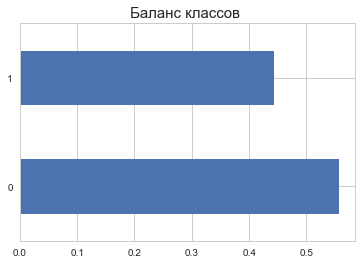

In [85]:
# Баланс классов
%pylab inline
a= train.target.value_counts()/ train.shape[0]
import pandas as pd
import matplotlib.pyplot as plt
plt.title('Баланс классов ', fontsize=15)
a.plot.barh(stacked=True);

In [86]:
train.target.value_counts()/ train.shape[0]

0    0.556222
1    0.443778
Name: target, dtype: float64

In [87]:
train.head()

,client_id,target
0,31984797,1
1,95623488,1
2,21248516,1
3,83228517,1
4,29053196,1


In [88]:
result_agg = result_agg.fillna(0)

In [89]:
result_agg = delete_not_inf_cols(result_agg)

In [90]:
result_agg.shape

(12000, 3337)

## Correlations

In [91]:
for cols in result_agg.columns.get_values().tolist():
    if result_agg[cols].nunique()==1:
        result_agg.drop([cols], axis=1, inplace=True)
        print(cols + 'deleted')

In [92]:
result_agg = result_agg.fillna(0)

In [93]:
CorrKoef = result_agg.corr()
CorField985 = []
print ('----- 2.1 Correlations')
print ('TOP > .985')
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.985]:
        if i != j and j not in CorField985 and i not in CorField985:
            CorField985.append(j)
            print ("%s-->%s: r^2=%f" % (i,j, CorrKoef[i][CorrKoef.index==j].values[0]))

print ('CorField985', len(CorField985))

----- 2.1 Correlations
TOP > .985
count_all_code_4814-->count_all_type_1030: r^2=0.998926
count_all_code_6010-->count_all_type_7070: r^2=0.989853
count_all_code_6010-->pay_ind_count1: r^2=0.999174
count_all_code_6010-->pay_ind_count1_month_10: r^2=0.991177
count_all_code_6010-->count_code_10_month_6010: r^2=0.992121
count_all_type_4035-->count_type_8_month_4035: r^2=1.000000
count_all_type_2341-->count_all_type_4061: r^2=1.000000
count_all_type_4051-->count_all_type_2331: r^2=0.999997
count_all_type_8100-->count_type_8_month_8100: r^2=0.997783
count_all_type_2000-->count_type_5_month_2000: r^2=1.000000
count_all_type_7071-->count_type_1_month_7071: r^2=0.991877
count_all_type_7071-->count_type_10_month_7071: r^2=0.993503
count_all_type_2371-->count_all_type_4071: r^2=1.000000
count_all_type_2110-->count_all_type_4110: r^2=0.998515
count_all_type_7044-->count_type_7_month_7044: r^2=1.000000
day_ind_count2-->pay_ind_count2: r^2=1.000000
pay_ind_count1_month_1-->count_type_1_month_7070: r

count_code_2_month_9211-->count_code_4_month_9211: r^2=1.000000
count_code_4_month_7932-->count_code_5_month_7932: r^2=0.995037
count_code_5_month_5965-->count_code_6_month_5965: r^2=0.995402
CorField985 166


In [94]:
result_agg = result_agg.drop(CorField985, 1)

In [95]:
result_agg.shape

(12000, 3171)

In [96]:
train = pd.read_csv('target_train.csv', sep = ',')

train = train.merge(result_agg, on='client_id', how = "left")

In [97]:
from sklearn.utils import shuffle
train = shuffle(train)

In [98]:
train.head()

,client_id,target,count_all_code_5944,count_all_code_5621,count_all_code_5697,count_all_code_7995,count_all_code_5137,count_all_code_5964,count_all_code_7210,count_all_code_5949,count_all_code_5199,count_all_code_5072,count_all_code_5921,count_all_code_6051,count_all_code_4812,count_all_code_7512,count_all_code_5993,count_all_code_4215,count_all_code_5122,count_all_code_5942,count_all_code_7221,count_all_code_5733,count_all_code_5131,count_all_code_5261,count_all_code_5947,count_all_code_5722,count_all_code_8062,count_all_code_5441,count_all_code_5094,count_all_code_7299,count_all_code_5599,count_all_code_7298,count_all_code_7699,count_all_code_7273,count_all_code_5969,count_all_code_5511,count_all_code_6300,count_all_code_7338,count_all_code_7372,count_all_code_7278,count_all_code_5532,count_all_code_5950,count_all_code_7395,count_all_code_8398,count_all_code_6211,count_all_code_7829,count_all_code_5651,count_all_code_5193,count_all_code_5968,count_all_code_5912,count_all_code_5735,count_all_code_5816,count_all_code_5541,count_all_code_7011,count_all_code_5462,count_all_code_5172,count_all_code_7531,count_all_code_5943,count_all_code_5300,count_all_code_4789,count_all_code_4131,count_all_code_7538,count_all_code_8220,count_all_code_7932,count_all_code_4722,count_all_code_5734,count_all_code_8299,count_all_code_8071,count_all_code_7399,count_all_code_5948,count_all_code_7311,count_all_code_6011,count_all_code_7933,count_all_code_9311,count_all_code_5977,count_all_code_5085,count_all_code_8699,count_all_code_4112,count_all_code_8011,count_all_code_4814,count_all_code_5499,count_all_code_5965,count_all_code_4900,count_all_code_5970,count_all_code_5811,count_all_code_5533,count_all_code_1711,count_all_code_7216,count_all_code_5812,count_all_code_5251,count_all_code_7629,count_all_code_7996,count_all_code_5399,count_all_code_7542,count_all_code_5941,count_all_code_8043,count_all_code_4511,count_all_code_5065,count_all_code_3351,count_all_code_5231,count_all_code_6536,count_all_code_7375,count_all_code_5074,count_all_code_7523,count_all_code_5099,count_all_code_4411,count_all_code_5111,count_all_code_7832,count_all_code_1799,count_all_code_5992,count_all_code_9399,count_all_code_7999,count_all_code_5814,count_all_code_1731,count_all_code_4111,count_all_code_5971,count_all_code_3501,count_all_code_5631,count_all_code_8641,count_all_code_5422,count_all_code_5967,count_all_code_5945,count_all_code_7997,count_all_code_4121,count_all_code_4899,count_all_code_5169,count_all_code_5571,count_all_code_5691,count_all_code_5931,count_all_code_5655,count_all_code_8099,count_all_code_7991,count_all_code_5713,count_all_code_5311,count_all_code_7993,count_all_code_7841,count_all_code_5611,count_all_code_8244,count_all_code_5995,count_all_code_5039,count_all_code_6012,count_all_code_5813,count_all_code_5712,count_all_code_5661,count_all_code_5013,count_all_code_5699,count_all_code_4784,count_all_code_5714,count_all_code_3000,count_all_code_5451,count_all_code_5310,count_all_code_9222,count_all_code_5641,count_all_code_6010,count_all_code_5331,count_all_code_5681,count_all_code_5732,count_all_code_5976,count_all_code_5542,count_all_code_5309,count_all_code_5940,count_all_code_5719,count_all_code_5211,count_all_code_7994,count_all_code_4829,count_all_code_9402,count_all_code_8021,count_all_code_4214,count_all_code_6513,count_all_code_5411,count_all_code_5999,count_all_code_742,count_all_code_5946,count_all_code_5200,count_all_code_4816,count_all_code_7230,count_all_code_5047,count_all_code_5045,count_all_code_9211,count_all_code_8999,count_all_code_2741,count_all_code_5044,count_all_code_5983,count_all_code_5994,count_all_code_5192,count_all_code_7922,count_all_type_4035,count_all_type_1210,count_all_type_6000,count_all_type_1200,count_all_type_6210,count_all_type_4210,count_all_type_2440,count_all_type_1310,count_all_type_7010,count_all_type_2341,count_all_type_4051,count_all_type_6100,count_all_type_4100,count_all_type_7034,count_all_type_7075,cou

In [99]:
test= pd.read_csv('target_test.csv', sep = ',')

In [100]:
test = test.merge(result_agg, on='client_id', how = "left")

In [101]:
test.head()

,client_id,count_all_code_5944,count_all_code_5621,count_all_code_5697,count_all_code_7995,count_all_code_5137,count_all_code_5964,count_all_code_7210,count_all_code_5949,count_all_code_5199,count_all_code_5072,count_all_code_5921,count_all_code_6051,count_all_code_4812,count_all_code_7512,count_all_code_5993,count_all_code_4215,count_all_code_5122,count_all_code_5942,count_all_code_7221,count_all_code_5733,count_all_code_5131,count_all_code_5261,count_all_code_5947,count_all_code_5722,count_all_code_8062,count_all_code_5441,count_all_code_5094,count_all_code_7299,count_all_code_5599,count_all_code_7298,count_all_code_7699,count_all_code_7273,count_all_code_5969,count_all_code_5511,count_all_code_6300,count_all_code_7338,count_all_code_7372,count_all_code_7278,count_all_code_5532,count_all_code_5950,count_all_code_7395,count_all_code_8398,count_all_code_6211,count_all_code_7829,count_all_code_5651,count_all_code_5193,count_all_code_5968,count_all_code_5912,count_all_code_5735,count_all_code_5816,count_all_code_5541,count_all_code_7011,count_all_code_5462,count_all_code_5172,count_all_code_7531,count_all_code_5943,count_all_code_5300,count_all_code_4789,count_all_code_4131,count_all_code_7538,count_all_code_8220,count_all_code_7932,count_all_code_4722,count_all_code_5734,count_all_code_8299,count_all_code_8071,count_all_code_7399,count_all_code_5948,count_all_code_7311,count_all_code_6011,count_all_code_7933,count_all_code_9311,count_all_code_5977,count_all_code_5085,count_all_code_8699,count_all_code_4112,count_all_code_8011,count_all_code_4814,count_all_code_5499,count_all_code_5965,count_all_code_4900,count_all_code_5970,count_all_code_5811,count_all_code_5533,count_all_code_1711,count_all_code_7216,count_all_code_5812,count_all_code_5251,count_all_code_7629,count_all_code_7996,count_all_code_5399,count_all_code_7542,count_all_code_5941,count_all_code_8043,count_all_code_4511,count_all_code_5065,count_all_code_3351,count_all_code_5231,count_all_code_6536,count_all_code_7375,count_all_code_5074,count_all_code_7523,count_all_code_5099,count_all_code_4411,count_all_code_5111,count_all_code_7832,count_all_code_1799,count_all_code_5992,count_all_code_9399,count_all_code_7999,count_all_code_5814,count_all_code_1731,count_all_code_4111,count_all_code_5971,count_all_code_3501,count_all_code_5631,count_all_code_8641,count_all_code_5422,count_all_code_5967,count_all_code_5945,count_all_code_7997,count_all_code_4121,count_all_code_4899,count_all_code_5169,count_all_code_5571,count_all_code_5691,count_all_code_5931,count_all_code_5655,count_all_code_8099,count_all_code_7991,count_all_code_5713,count_all_code_5311,count_all_code_7993,count_all_code_7841,count_all_code_5611,count_all_code_8244,count_all_code_5995,count_all_code_5039,count_all_code_6012,count_all_code_5813,count_all_code_5712,count_all_code_5661,count_all_code_5013,count_all_code_5699,count_all_code_4784,count_all_code_5714,count_all_code_3000,count_all_code_5451,count_all_code_5310,count_all_code_9222,count_all_code_5641,count_all_code_6010,count_all_code_5331,count_all_code_5681,count_all_code_5732,count_all_code_5976,count_all_code_5542,count_all_code_5309,count_all_code_5940,count_all_code_5719,count_all_code_5211,count_all_code_7994,count_all_code_4829,count_all_code_9402,count_all_code_8021,count_all_code_4214,count_all_code_6513,count_all_code_5411,count_all_code_5999,count_all_code_742,count_all_code_5946,count_all_code_5200,count_all_code_4816,count_all_code_7230,count_all_code_5047,count_all_code_5045,count_all_code_9211,count_all_code_8999,count_all_code_2741,count_all_code_5044,count_all_code_5983,count_all_code_5994,count_all_code_5192,count_all_code_7922,count_all_type_4035,count_all_type_1210,count_all_type_6000,count_all_type_1200,count_all_type_6210,count_all_type_4210,count_all_type_2440,count_all_type_1310,count_all_type_7010,count_all_type_2341,count_all_type_4051,count_all_type_6100,count_all_type_4100,count_all_type_7034,count_all_type_7075,count_all_

In [102]:
X = train.drop(['client_id', 'target'], axis=1)
y = train.target

In [208]:
## Cross validation

import xgboost as xgb
import lightgbm as lgbm
from sklearn import ensemble, cross_validation, learning_curve, metrics 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model1 = lgbm.LGBMClassifier(num_leaves=60,learning_rate=0.01,max_depth = -1, metric = 'roc_auc', 
subsample=0.7, min_child_samples = 45, n_estimators=1000) 

model2 = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.2, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=8, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=130, silent=True, subsample=0.7)

model3 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=500, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

model4 = lr = LogisticRegression(C=90 , dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

models= [model1, model2, model3, model4]

## Accuracy by folds

In [213]:
from sklearn.model_selection import cross_val_score
score1 = []
for i, mods in enumerate( models):
    scores_cv=[]
    scores_cv =cross_val_score(mods, X, y,  scoring = 'roc_auc', cv = 3)  
    score1.append(scores_cv)
    print( str(i) + '_th model CV scored')

0_th model CV scored
1_th model CV scored
2_th model CV scored
3_th model CV scored


In [221]:
accuracy =  pd.DataFrame(score, columns= ['accuracy1', 'accuracy2', 'accuracy3'])
accuracy['model_name'] = pd.DataFrame(['lgbm', 'xgb', 'rf', 'lr'])
accuracy.set_index(['model_name'], inplace=True)

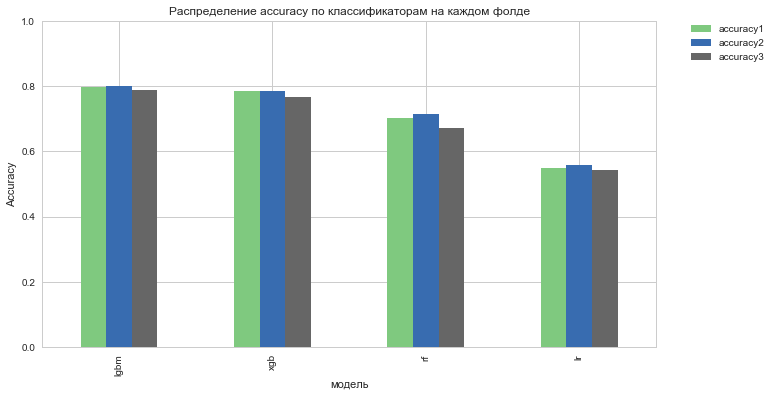

In [237]:
accuracy.plot(kind='bar',  ylim=(0.,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), accuracy.index)
plt.xlabel('модель')
plt.ylabel('Accuracy')
plt.title('Распределение accuracy по классификаторам на каждом фолде')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Roc-auc by folds

In [240]:
roc_auc =  pd.DataFrame(score1, columns= ['roc_auc1', 'roc_auc2', 'roc_auc3'])
roc_auc['model_name'] = pd.DataFrame(['lgbm', 'xgb', 'rf', 'lr'])
roc_auc.set_index(['model_name'], inplace=True)

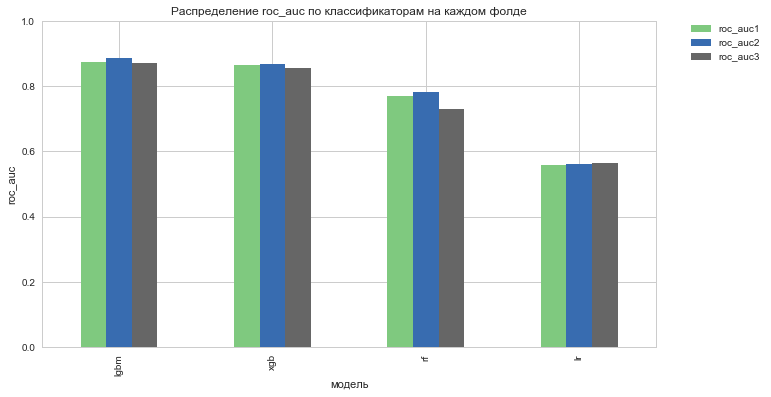

In [242]:
roc_auc.plot(kind='bar',  ylim=(0.,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), roc_auc.index)
plt.xlabel('модель')
plt.ylabel('roc_auc')
plt.title('Распределение roc_auc по классификаторам на каждом фолде')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Подбор отсечки

In [103]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

6300 2700


C:\Users\somarov\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [105]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(num_leaves=60,learning_rate=0.01,max_depth = -1, metric = 'roc_auc', 
subsample=0.7, min_child_samples = 45, n_estimators=1000) 

In [106]:
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.01, max_depth=-1, metric='roc_auc',
        min_child_samples=45, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=60, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.7, subsample_for_bin=200000, subsample_freq=1)

In [107]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1] )
print(roc)

0.874333955206


In [108]:
pred = model.predict_proba(X_test)[:,1]
all_pred = pd.DataFrame(np.vstack([y_test, pred])).T
all_pred.columns = ['true', 'prob']
all_pred.sort_values('prob', ascending=False, inplace=True)

In [109]:
all_pred

,true,prob
2625,1.0,0.998601
2207,1.0,0.998338
1450,1.0,0.998189
70,1.0,0.997846
2225,1.0,0.997500
81,1.0,0.996913
1556,1.0,0.996762
1267,1.0,0.996527
218,1.0,0.996341
2152,1.0,0.996274


In [111]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
y_true = all_pred['true']
recall = []
precision = []
score = []
accuracy_new= []

#aa =np.sort(table.pred.unique())
aa = np.sort(all_pred['prob'].unique())
for i in range(0, len(aa), 10):
    f = lambda x: 1 if x >aa[i] else 0
    score.append(aa[i])
    y_pred = all_pred['prob'].map(f)
    g=recall_score(y_true, y_pred, average='binary')
    recall.append(g)
    p = precision_score(y_true, y_pred, average='binary')
    precision.append(p)
    f =accuracy_score(y_true, y_pred)
    accuracy_new.append(f)
    

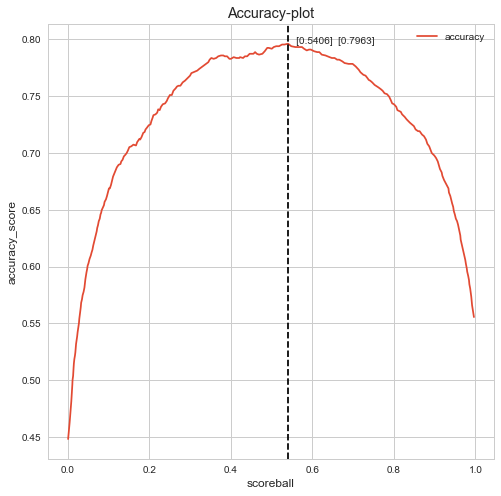

In [115]:
from matplotlib.pyplot import *
%matplotlib inline
style.use('ggplot')
sns.set_style("whitegrid")
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
plt.figure(figsize=(8,8))
plt.grid(True)
#plt.plot(score, recall, 'o-', label="Полнота")
plt.plot(score, accuracy_new, label="accuracy")
max_i = acc_score.loc[acc_score['accuracy_score'] ==acc_score['accuracy_score'].max(), 'score'].values
max_j = acc_score.loc[acc_score['accuracy_score'] ==acc_score['accuracy_score'].max(), 'accuracy_score'].values
plt.axvline(x= max_i, color='k', linestyle='--')
plt.xlabel('scoreball')
plt.ylabel('accuracy_score')
plt.title('Accuracy-plot')
plt.legend()

plt.text(max_i,max_j, '   ' + str(np.around(max_i, 4).tolist())  + '  '+ str(np.round(max_j, 4).tolist()), fontsize=10)
sns.plt.legend()

In [113]:
## Находим скорбалл, на котором достигается максимум accuracy
acc_score = pd.DataFrame(np.vstack([score, accuracy_new]).T)
acc_score.columns = ['score', 'accuracy_score']
acc_score.loc[acc_score['accuracy_score'] ==acc_score['accuracy_score'].max(), 'score'].values

array([ 0.54055345])

In [114]:
# считаем качество roc_auc и accuracy по фолдам и выводим среднее значение
scores_lgbm =cross_val_score(model, X, y,  scoring = 'roc_auc', cv = 3)  
print('cross_validation roc-auc score on 3 folds equal to ={} \ngini mean on 3 folds equal to =  {}'.format(scores_lgbm, scores_lgbm.mean()))

scores_lgbm =cross_val_score(model, X, y,  scoring = 'accuracy', cv = 3)  
print('cross_validation accuracy score on 3 folds equal to ={} \ngini mean on 3 folds equal to =  {}'.format(scores_lgbm, scores_lgbm.mean()))

NameError: name 'cross_val_score' is not defined

Plot feature importances...


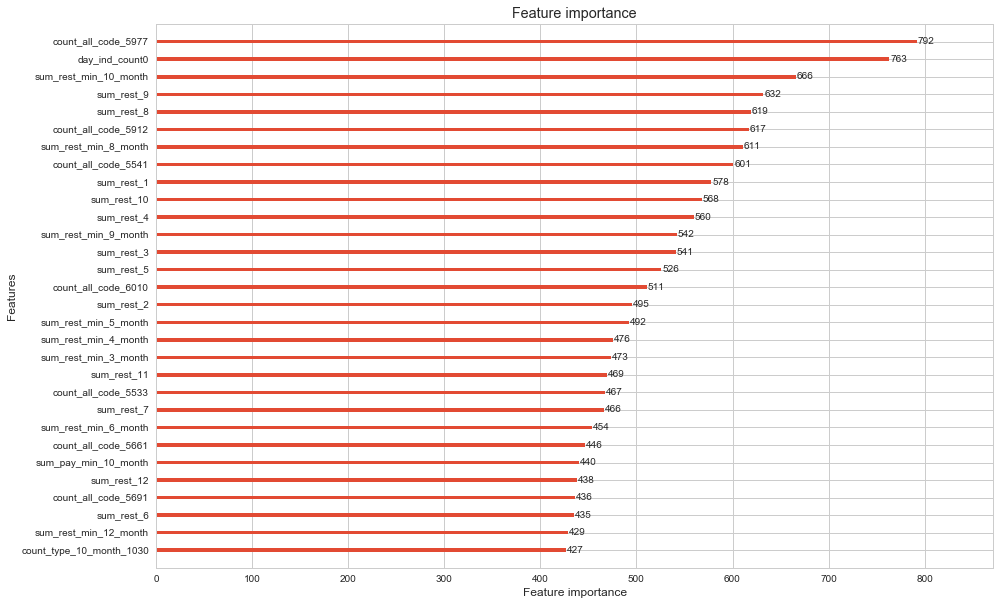

In [297]:
## смотрим на важность предикторов
print('Plot feature importances...')
sns.set_style("whitegrid")
#plt.plot( fontweight='bold')
ax = lgbm.plot_importance(model, max_num_features=30, figsize=(15, 10))
plt.show()

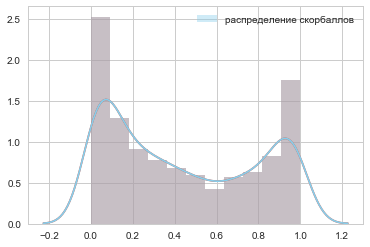

In [300]:
new = model.predict_proba(X_test)[:,1]
sns.distplot(new);
sns.distplot( new , color="skyblue", label="распределение скорбаллов")
sns.plt.legend()


## Скоринг тестовой выборки

In [116]:
test_for_clients = test.drop('client_id', axis=1)

for_clients = test[['client_id']]

for_clients['target'] = model.predict_proba(test_for_clients)[:,1]
for_clients['target'] = for_clients['target'].map(lambda x: 1 if x >0.54976983 else 0)

In [118]:
for_clients

,client_id,target
0,115617,0
1,18879570,1
2,34338435,0
3,48537787,0
4,6914241,0
5,89621917,0
6,57232590,0
7,21770327,0
8,64026830,1
9,87923873,0


In [120]:
for_clients.to_csv('test_predicted.csv', sep = '\t', index = False)